# Introduction 


Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


# Data Set

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

####  Important Question for Exploration steps:

Where do Capital Bikeshare riders go? When do they ride? How far do they go? Which stations are most popular? What days of the week are most rides taken on? We've heard all of these questions since we launched in 2010, and we're glad to provide the data that shows you the answers from our first trip to today.

Associated tasks:
=========================================

	- Regression: 
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.
	
	- Event and Anomaly Detection:  
		Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.
		For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy.
        Some of the important events are identified in [1].
        Therefore the data can be used for validation of anomaly or event detection algorithms as well.

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# load hourly data
hourly_data = pd.read_csv('hour.csv')

In [2]:
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# print some generic statistics about the data
print(f"Shape of data: {hourly_data.shape}")
print(f"Number of missing values in the data:{hourly_data.isnull().sum().sum()}")

Shape of data: (17379, 17)
Number of missing values in the data:0


In [4]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# get statistics on the numerical columns
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


we can split the columns into three main groups:
- temporal features
- weather related features
- record related features: 

###  > Preprocessing Temporal and Weather Features :

In [6]:
# create a copy of the original data 
#pre_data == preprocessed_data
pre_data = hourly_data.copy() 

In [7]:
#Encoding seasons
seasons_mapping ={1:"winter",2:"spring",3:"summer",4:"fall"}
pre_data["season"]=pre_data["season"].apply(lambda x :seasons_mapping[x])

In [8]:
# Encoding year
year_mapping={0:"2011",1:"2012"}
pre_data["yr"]=pre_data["yr"].apply(lambda z: year_mapping[z])

In [9]:
# Encoding weekdays
weak_mapping={0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday',6: 'Saturday'} 
pre_data["weekday"]=pre_data["weekday"].apply(lambda y:weak_mapping[y])

In [10]:
# Enconding weather conditions
weather_mapping = {1: 'clear', 2: 'cloudy',3: 'light_rain_snow', 4: 'heavy_rain_snow'}
pre_data['weathersit'] = pre_data['weathersit'].apply(lambda x:weather_mapping[x])

In [11]:
pre_data["hum"]=pre_data["hum"]*100

In [12]:
pre_data["windspeed"]=pre_data["windspeed"]*67

In [13]:
#visualize the results from transformation
encoding_col=["season", "yr","weekday","weathersit","hum","windspeed"]
pre_data[encoding_col]

,season,yr,weekday,weathersit,hum,windspeed
0,winter,2011,Saturday,clear,81.0,0.0000
1,winter,2011,Saturday,clear,80.0,0.0000
2,winter,2011,Saturday,clear,80.0,0.0000
3,winter,2011,Saturday,clear,75.0,0.0000
4,winter,2011,Saturday,clear,75.0,0.0000
...,...,...,...,...,...,...
17374,winter,2012,Monday,cloudy,60.0,11.0014
17375,winter,2012,Monday,cloudy,60.0,11.0014
17376,winter,2012,Monday,clear,60.0,11.0014
17377,winter,2012,Monday,clear,56.0,8.9981


### > The first step in analyzing the Casual & registered columns is to look at their distributions:

In [14]:
pre_data["casual"].sum()

620017

In [15]:
pre_data["registered"].sum()

2672662

In [16]:
"""
assert that total number of rides is equal to the sum of registered and
casual ones
"""
assert (pre_data.casual+ pre_data.registered == pre_data.cnt).all(),\
'Sum of casual and registered rides not'\
' equal to total number of rides'

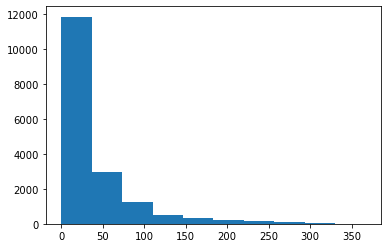

In [17]:
plt.hist(pre_data["casual"]);

plt.show()

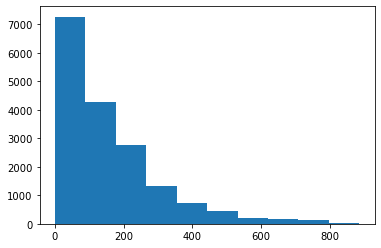

In [18]:
plt.hist(pre_data["registered"]);
plt.show()

C:\Users\princ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\princ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


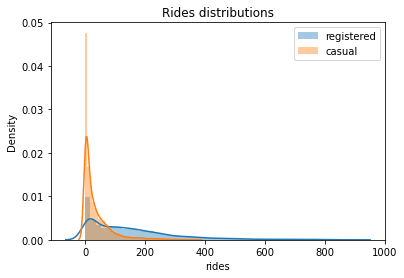

In [40]:
# plot distributions of registered vs casual rides
sns.distplot(pre_data['registered'], label='registered');
sns.distplot(pre_data['casual'], label='casual');
plt.legend();
plt.xlabel('rides');
plt.title("Rides distributions");
plt.savefig('rides_distributions.png', format='png');

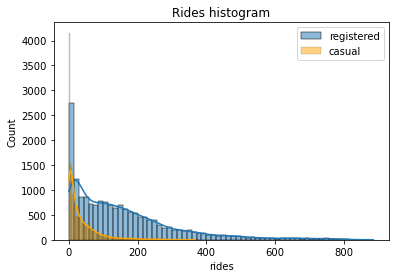

In [42]:
# plot histogram of registered vs casual rides
sns.histplot(pre_data['registered'], label='registered',kde=True)
sns.histplot(pre_data['casual'], label='casual',color='orange',kde=True)
plt.legend()
plt.xlabel('rides')
plt.title("Rides histogram")
plt.savefig('rides_histograms.png', format='png')

####  - we can easily see that registered users perform way more rides than casual ones

####  - Furthermore, we can see that the two distributions are skewed to the right, meaning that, for most of the entries in the data, zero or a small number of rides were registered

### > Focus on the evolution of rides over time:

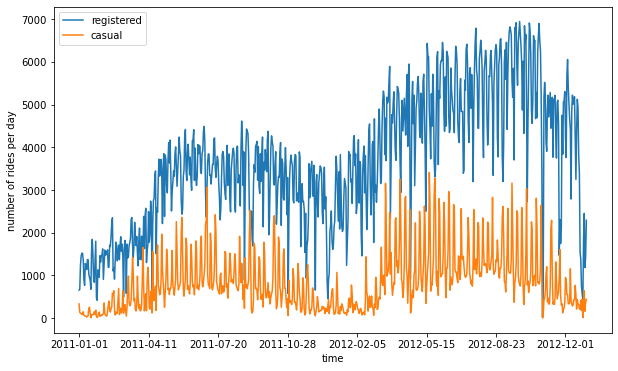

In [24]:
# plot evolution of rides over time
plot_data = pre_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
plt.savefig('rides_daily.png', format='png')

####  - the number of registered rides is always above and significantly higher than the number of casual rides per day

#### - during winter, the overall number of rides decreases (which is as bad weather and low temperatures have a negative impact on ride sharing services).

### > Note that there is quite a lot of variance in the time series of the rides
##### One way to smooth out the curves is to take the rolling mean and standard deviation of the two time series and plot those instead. In this way, we can visualize not only the average number of rides for a specific time period (also known as a window) but also the expected deviation from the mean

In [25]:
"""
Create new dataframe with necessary for plotting columns, and obtain
number of rides per day, by grouping over each day
"""
plot_data = pre_data[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()

In [26]:
"""
define window for computing the rolling mean and standard deviation
"""
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()


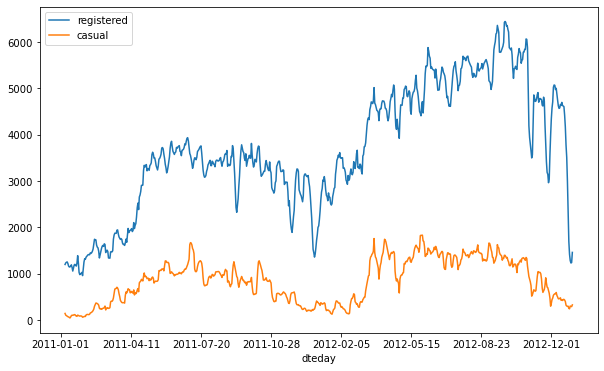

In [28]:
"""
Create a plot of the series, where we first plot the series of rolling
means
"""
ax = rolling_means.plot(figsize=(10,6))
plt.savefig('rides_aggregated1.png', format='png')

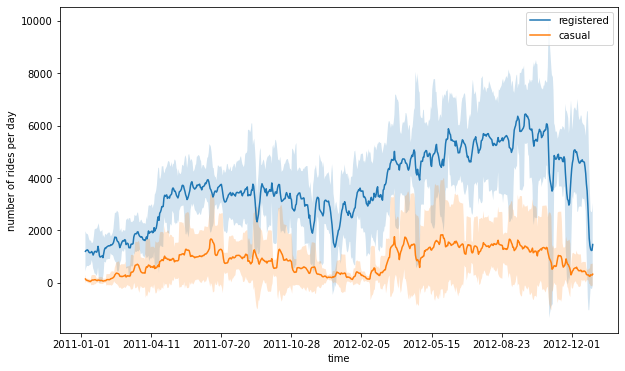

In [29]:
"""
then we color the zone between the series of rolling means +- 2
rolling standard deviations
"""
ax = rolling_means.plot(figsize=(10,6))
ax.fill_between(rolling_means.index, rolling_means['registered'] \
                + 2*rolling_deviations['registered'], \
                rolling_means['registered'] \
                - 2*rolling_deviations['registered'], \
                alpha = 0.2)
ax.fill_between(rolling_means.index, rolling_means['casual'] \
                + 2*rolling_deviations['casual'], \
                rolling_means['casual'] \
                - 2*rolling_deviations['casual'], \
                alpha = 0.2)
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
plt.savefig('rides_aggregated2.png', format='png')

### >Focus on the distributions of the requests over separate hours and days of the week. 
##### We would expect certain time patterns to arise, as bike requests should be more frequent during certain hours of the day, depending on the day of the week.


In [30]:
# select relevant columns
plot_data = pre_data[['hr', 'weekday', 'registered', 'casual']]

In [31]:
plot_data

,hr,weekday,registered,casual
0,0,Saturday,13,3
1,1,Saturday,32,8
2,2,Saturday,27,5
3,3,Saturday,10,3
4,4,Saturday,1,0
...,...,...,...,...
17374,19,Monday,108,11
17375,20,Monday,81,8
17376,21,Monday,83,7
17377,22,Monday,48,13


In [32]:
"""
transform the data into a format, in number of entries are computed as
count,
for each distinct hr, weekday and type (registered or casual)
"""
plot_data = plot_data.melt(id_vars=['hr', 'weekday'], value_vars=["casual","registered"],
                           var_name='customer_type', value_name='count')

In [33]:
plot_data

,hr,weekday,customer_type,count
0,0,Saturday,casual,3
1,1,Saturday,casual,8
2,2,Saturday,casual,5
3,3,Saturday,casual,3
4,4,Saturday,casual,0
...,...,...,...,...
34753,19,Monday,registered,108
34754,20,Monday,registered,81
34755,21,Monday,registered,83
34756,22,Monday,registered,48


In [34]:
plot_data["weekday"].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

C:\Users\princ\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


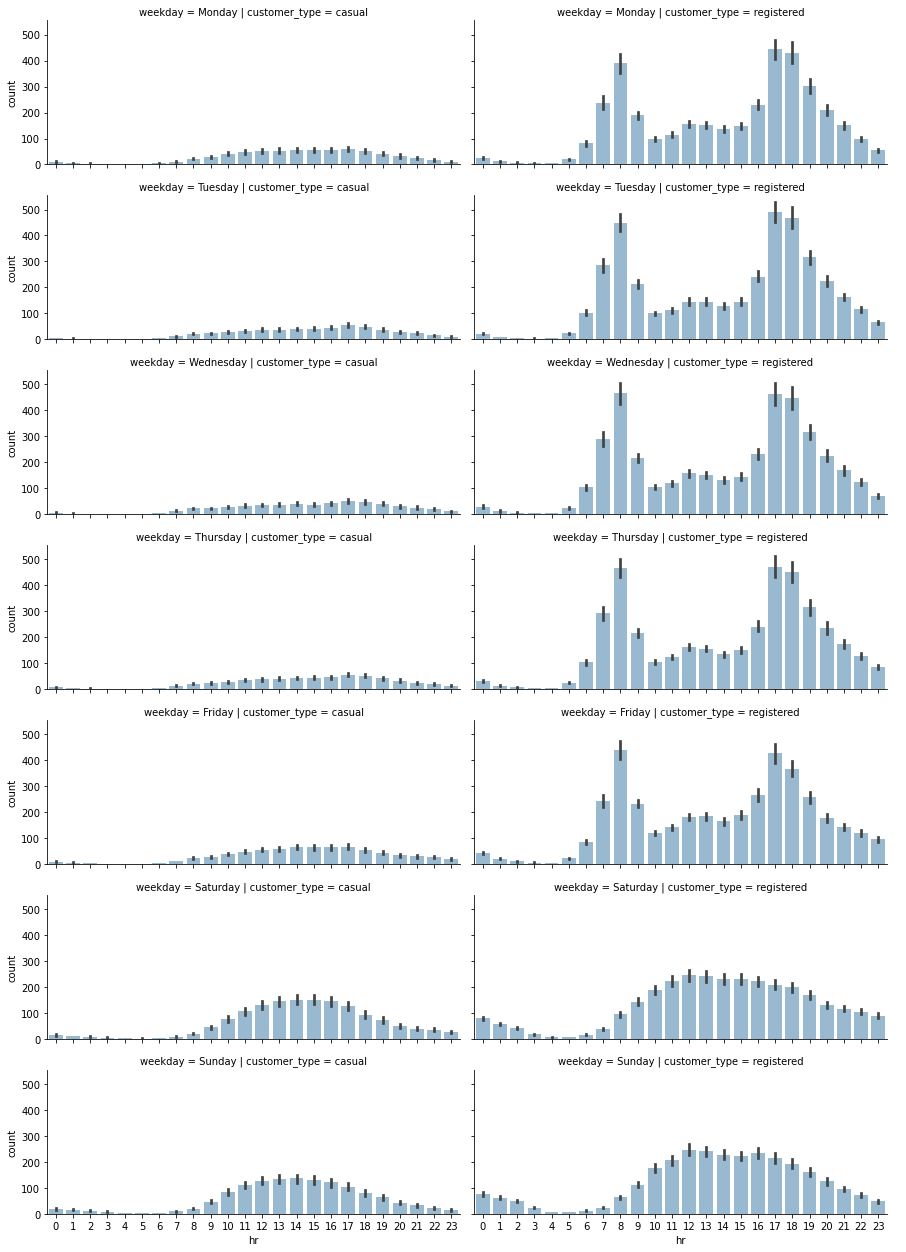

In [36]:

"""
create FacetGrid object, in which a grid plot is produced.
As columns, we have the various days of the week,
as rows, the different types (registered and casual)
"""
grid = sns.FacetGrid(plot_data, col='customer_type', row='weekday',
                      height=2.5, aspect=2.5, row_order=['Monday', 'Tuesday',\
                                                        'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']);
# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5).add_legend()
grid.savefig('weekday_hour_distributions.png', format='png');

##### - Note that on `working days`, the highest number of rides for registered users takes place around 8 AM and at 6 PM. As it is likely that most registered users use the bike sharing service for commuting.
##### On the other hand, the casual usage of bike sharing services on working days is quite limited .

##### -During the` weekend`, we can see that ride distributions change for both casual and registered users. Still, registered rides are more frequent than casual ones, but both the distributions have the same shape, almost uniformly distributed between the time interval of 11 AM to 6 PM.

##### - As a conclusion, we could claim that most of the usage of bike sharing services occurs during `working days`, right before and right after the standard working time (that is, 9 to 5)

### > Analyzing Seasonal Impact on Rides:

#####  >>investigate the impact of the different seasons on the total number of rides.

C:\Users\princ\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


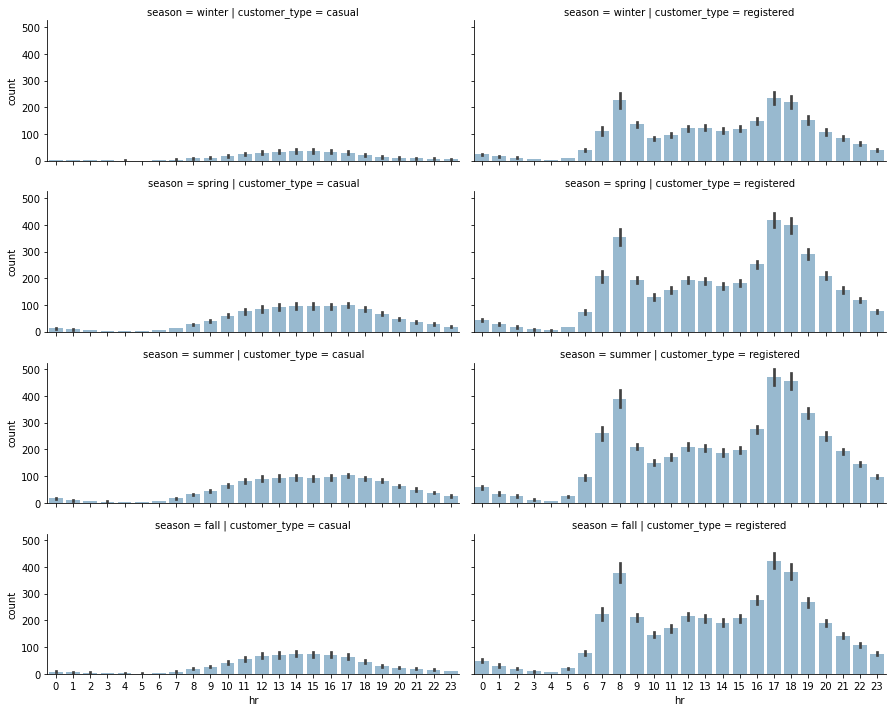

In [37]:


# select subset of the data
plot_data = pre_data[['hr', 'season', 'registered', 'casual']]

# unpivot data from wide to long format
plot_data = plot_data.melt(id_vars=['hr', 'season'], value_vars=["casual","registered"],\
                           var_name='customer_type', value_name='count')

# define FacetGrid
grid = sns.FacetGrid(plot_data, row='season', col='customer_type',\
                     height=2.5, aspect=2.5, row_order=['winter','spring',  'summer', 'fall'])

# apply plotting function to each element in the grid
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
# save figure
grid.savefig('exercise_1_02_a.png', format='png')

####  From the graph, while each season has a similar graph shape, the count is lower for the winter graph. So there are fewer rides 
#### (registered and casual) during winter. This makes sense, as fewer rides are likely to occur when the weather conditions are poor. 

### >>Distribution of rides on a weekday basis:

In [38]:
# create a subset of relevant columns
plot_data = pre_data[['weekday', 'season', 'registered', 'casual']]

plot_data = plot_data.melt(id_vars=['weekday', 'season'],value_vars=["casual","registered"],\
                           var_name='customer_type', value_name='count')

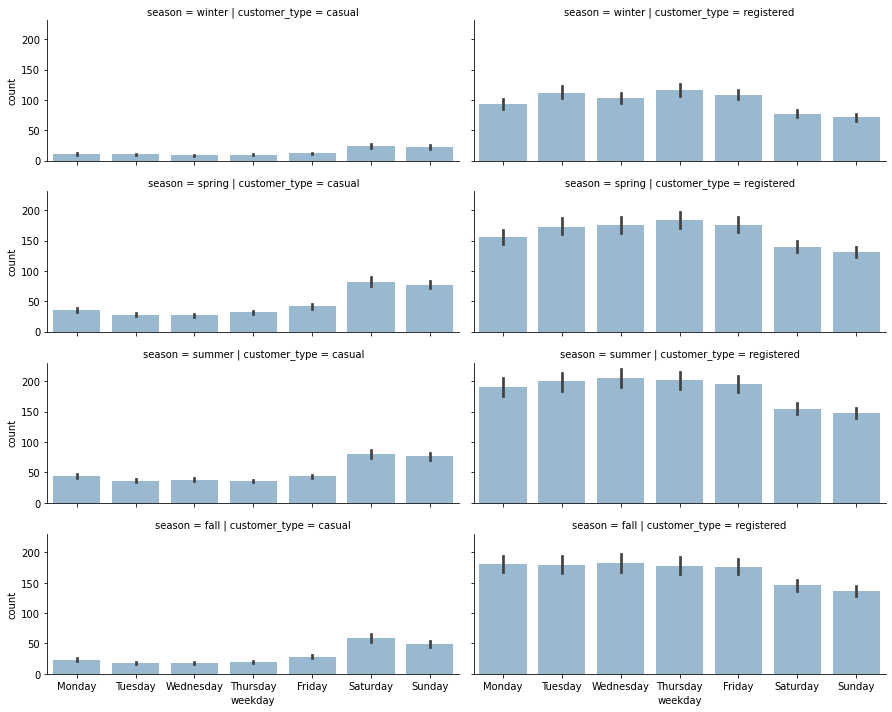

In [39]:
grid = sns.FacetGrid(plot_data, row='season', col='customer_type', \
                     height=2.5, aspect=2.5, row_order=['winter', 'spring',  'summer', 'fall'])

grid.map(sns.barplot, 'weekday', 'count', alpha=0.5, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', \
                'Friday', 'Saturday', 'Sunday'])

#### There is a decreasing number of registered rides over the weekend (compared to the rest of the week),
#### while the number of casual rides increases. This could enforce our initial hypothesis, that is, that registered customersmostly use the bike sharing service for commuting (which could be the reason for the decreasing number of registered rides over the weekend), while casual customers use the service occasionally over the weekend. 